### Persistance images from H0 and H1 persistence

In [5]:
# import libraries
import numpy as np
import re
import matplotlib.pyplot as plt

from ripser import Rips
from persim import PersistenceImager

import glob
import pickle
import geopandas as gpd
import dcor
import pandas as pd


In [2]:
# remove warnings
import warnings
warnings.filterwarnings("ignore")

In [30]:
# load the dictonary into a dictionary from the pkl files
data = {}

for file in glob.glob("/Users/h6x/Desktop/selected_coordinates_below_90th_all_variables/IN/*.pkl"):
    with open(file, 'rb') as f:
        
        # select last 20 characters of the file name
        extracted_words = file[-20:]

        match = re.search(r'(\d+)', extracted_words)
        if match:
            extracted_number = match.group(1)
            # print(extracted_number)
            # print(type(extracted_number))

            data[extracted_number] = pd.read_pickle(f)
        else:
            print("No number found in the string.")

##### Distance matrix

In [31]:
import ripser
import persim

def diagram_sizes(dgms):
    return ", ".join([f"|$H_{i}$|={len(d)}" for i, d in enumerate(dgms)])

In [32]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

[[1.         0.50365364 0.77715841 0.74041151 0.33566599 0.58521169
  0.39815027 0.44204814 0.49700443 0.43086091 0.3942382  0.52547125
  0.2884522  0.37553667 0.76308391 0.34156649]
 [0.50365364 1.         0.57958664 0.40159762 0.32670732 0.29537328
  0.37205174 0.32606956 0.36694899 0.34917924 0.51878217 0.49548525
  0.32163368 0.36252903 0.56261634 0.27448693]
 [0.77715841 0.57958664 1.         0.77174517 0.34124233 0.54512753
  0.47604017 0.48240511 0.51264465 0.38592559 0.36582922 0.56138315
  0.32300076 0.28101704 0.61431211 0.25464686]
 [0.74041151 0.40159762 0.77174517 1.         0.28576034 0.52326159
  0.38324466 0.33308613 0.50454189 0.36119795 0.27044889 0.47069775
  0.24737911 0.34219051 0.52058593 0.3132378 ]
 [0.33566599 0.32670732 0.34124233 0.28576034 1.         0.31227905
  0.27200123 0.50802723 0.2796336  0.38244318 0.57152045 0.46163049
  0.28011048 0.28755978 0.26894925 0.25743746]
 [0.58521169 0.29537328 0.54512753 0.52326159 0.31227905 1.
  0.48508097 0.41369904 0

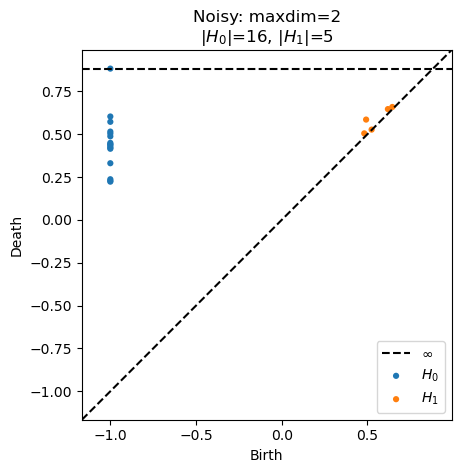

In [59]:
for fips, dictionary in data.items():
    # data is a dictionary where the key is the county code and the value is a another dictionary

    data_matrix = np.zeros((20, 16))
    selected_counties_dist = np.zeros((16, 16))

    k=0
    for key, value in dictionary.items():

        # print(fips)
        # print(key)
        # print(value)

        # if the value is not empty, append it to the list

        if len(value)> 0:

            #get only 5 rows from the value
            value = value.head(20)
            
            # get the length of the value df

            length = value.shape[0]
            # print(length)

            # print(value[key])

            # store the data in a column of the data matrix
            data_matrix[:, k] = value[key]
            k=k+1
    
    # print(data_matrix.shape)


    for i in range(16):
        for j in range(16):
            selected_counties_dist[i, j] = dcor.distance_correlation(data_matrix[:, i], data_matrix[:, j]) #Distance Correlations 
    
    print(selected_counties_dist)

    selected_counties_dist = selected_counties_dist.T + np.eye(16)
    selected_counties_dist = 1 - selected_counties_dist

    # print(selected_counties_dist)

    dgm_noisy = ripser.ripser(selected_counties_dist, distance_matrix=True)['dgms']

    print(len(dgm_noisy[0]))
    print(len(dgm_noisy[1]))


    persim.plot_diagrams(
        dgm_noisy, show=True,
        title=f"Noisy: maxdim=2\n{diagram_sizes(dgm_noisy)}"
    )

            



    break
        

#### Persistence Images

In [ ]:
# Generating the persistence images H0 and H1 separately

In [ ]:
# for fips, dictionary in data.items():
#     # data is a dictionary where the key is the county code and the value is a another dictionary
    
#     for key, value in dictionary.items():

#         # if the value is not empty, append it to the list
#         if len(value)> 0:

#             # get the coordinates into a numpy array
#             data_coordinates = np.array([np.array(coord) for coord in value['coords']])

#             # creating the persistence diagram from rips class
#             rips = Rips(maxdim=1, coeff=2)
#             dgms = rips.fit_transform(data_coordinates)

#             # seperate the diagrams H0 and H1
#             diagrams_h0 = dgms[0]
#             diagrams_h1 = dgms[1]

#             # if diagrams_h0 is not empty, get the max value
#             if len(diagrams_h0) > 1: #Think

#                 # remove last data point in H0 diagram - it is infinity
#                 diagrams_h0_without_inf = diagrams_h0[0:-1]


#                 pimgr = PersistenceImager(pixel_size=0.1)
#                 pimgr.fit(diagrams_h0_without_inf)

#                 pimgr.pixel_size = 0.005
#                 pimgr.birth_range = (0.0, 0.28)
#                 pimgr.pers_range = (0.0, 0.28)


#                 # pixel size 1 and sigma 0.1
#                 fig, axs = plt.subplots(1, 2, figsize=(20,5))
#                 pimgr.kernel_params = {'sigma': .1}
#                 pimgr.plot_diagram(diagrams_h0_without_inf, skew=True, ax=axs[0])
#                 axs[0].set_title('Diagram', fontsize=16)

#                 pimgr.kernel_params = {'sigma': 0.000005}
#                 pimgr.plot_image(pimgr.transform(diagrams_h0_without_inf), ax=axs[1])
#                 axs[1].set_title('Kernel Spread: 0.1', fontsize=16)
          

#                 plt.tight_layout()
#                 # save the plot using county fips and key diagram type
#                 plt.savefig('./results/persistence images/' + fips + '_' + key + '_H0.png')
#                 plt.close()
#                 # plt.show()

            


#             if len(diagrams_h1) > 0:
#                 pimgr_1 = PersistenceImager(pixel_size=0.1)
#                 pimgr_1.fit(diagrams_h1)

#                 pimgr_1.pixel_size = 0.005
#                 pimgr_1.birth_range = (0.0, 0.28)
#                 pimgr_1.pers_range = (0.0, 0.28)

#                 fig, axs = plt.subplots(1, 2, figsize=(20,5))
#                 pimgr_1.kernel_params = {'sigma': .1}
#                 pimgr_1.plot_diagram(diagrams_h1, skew=True, ax=axs[0])
#                 axs[0].set_title('Diagram', fontsize=16)

#                 pimgr_1.kernel_params = {'sigma': 0.000005}
#                 pimgr_1.plot_image(pimgr_1.transform(diagrams_h1), ax=axs[1])
#                 axs[1].set_title('Kernel Spread: 0.1', fontsize=16)


#                 plt.tight_layout()

#                 # save the plot using county fips and key diagram type
#                 plt.savefig('./results/persistence images/' + fips + '_' + key + '_H1.png')
#                 plt.close()

#                 # plt.show()


##### Persistence images - H0 and H1 in the same image

In [ ]:
for fips, dictionary in data.items():
    # data is a dictionary where the key is the county code and the value is a another dictionary
    
    for key, value in dictionary.items():

        # if the value is not empty, append it to the list
        if len(value)> 0:

            # get the coordinates into a numpy array
            data_coordinates = np.array([np.array(coord) for coord in value['coords']])

            # creating the persistence diagram from rips class
            rips = Rips(maxdim=1, coeff=2)
            dgms = rips.fit_transform(data_coordinates)

            # seperate the diagrams H0 and H1
            diagrams_h0 = dgms[0]
            diagrams_h1 = dgms[1]

            # if diagrams_h0 is not empty, get the max value
            if len(diagrams_h0) > 1: 

                # remove last data point in H0 diagram - it is infinity
                diagrams_h0_without_inf = diagrams_h0[0:-1]


                pimgr = PersistenceImager(pixel_size=0.1)
                pimgr.fit(diagrams_h0_without_inf)

                pimgr.pixel_size = 0.005
                pimgr.birth_range = (0.0, 0.28)
                pimgr.pers_range = (0.0, 0.28)


                pimgr.kernel_params = {'sigma': 0.000005}
                image_h0 =pimgr.transform(diagrams_h0_without_inf)

            if len(diagrams_h1) > 0:

                pimgr_1 = PersistenceImager(pixel_size=0.1)
                pimgr_1.fit(diagrams_h1)

                pimgr_1.pixel_size = 0.005
                pimgr_1.birth_range = (0.0, 0.28)
                pimgr_1.pers_range = (0.0, 0.28)

                pimgr_1.kernel_params = {'sigma': 0.000005}
                image_h1 = pimgr_1.transform(diagrams_h1)


            # saving the plot

            if len(diagrams_h0) > 1 & len(diagrams_h1) > 0:
                # Rotate 90 degrees to the left(k=3), 90 degrees to the right(k=1), 180 degrees(k=2)
                C_rotated = np.rot90(image_h0+image_h1, k=1) 

                plt.figure(figsize=(2.4, 2.4))
                plt.imshow(C_rotated, cmap='viridis')  # Assuming 'viridis' colormap, change as needed
                plt.axis('off')  # Turn off axis

                plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Adjust subplot parameters to remove borders
                # plt.savefig(f'./results/persistence images/H0H1/{key}/' + fips + '_' + key + '_H0H1.png')
                plt.savefig(f'./results/persistence images/percentiles/H0H1/{key}/' + fips +'.png')
                plt.close()
            elif len(diagrams_h0) > 1 & len(diagrams_h1) == 0:
                # Rotate 90 degrees to the left(k=3), 90 degrees to the right(k=1), 180 degrees(k=2)
                C_rotated = np.rot90(image_h0, k=1) 

                plt.figure(figsize=(2.4, 2.4))
                plt.imshow(C_rotated, cmap='viridis')  # Assuming 'viridis' colormap, change as needed
                plt.axis('off')  # Turn off axis

                plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Adjust subplot parameters to remove borders
                # plt.savefig(f'./results/persistence images/H0H1/{key}/' + fips + '_' + key + '_H0H1.png')
                plt.savefig(f'./results/persistence images/percentiles/H0H1/{key}/' + fips +'.png')
                plt.close()
            elif len(diagrams_h0) < 1 & len(diagrams_h1) > 0:
                # Rotate 90 degrees to the left(k=3), 90 degrees to the right(k=1), 180 degrees(k=2)
                C_rotated = np.rot90(image_h1, k=1) 

                plt.figure(figsize=(2.4, 2.4))
                plt.imshow(C_rotated, cmap='viridis')  # Assuming 'viridis' colormap, change as needed
                plt.axis('off')  # Turn off axis

                plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Adjust subplot parameters to remove borders
                # plt.savefig(f'./results/persistence images/H0H1/{key}/'+ fips + '_' + key + '_H0H1.png')
                plt.savefig(f'./results/persistence images/percentiles/H0H1/{key}/' + fips +'.png')
                plt.close()
            else:
                # empty image
                empty_image = np.zeros((24, 24))

                plt.figure(figsize=(2.4, 2.4))
                plt.imshow(empty_image, cmap='viridis')  # Assuming 'viridis' colormap, change as needed
                plt.axis('off')  # Turn off axis
                
                plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Adjust subplot parameters to remove borders
                # plt.savefig(f'./results/persistence images/H0H1/{key}/' + fips + '_' + key + '_H0H1.png')
                plt.savefig(f'./results/persistence images/percentiles/H0H1/{key}/' + fips +'.png')
                plt.close()
                
        else:
            # empty image
            empty_image = np.zeros((24, 24))

            plt.figure(figsize=(2.4, 2.4))
            plt.imshow(empty_image, cmap='viridis')  # Assuming 'viridis' colormap, change as needed
            plt.axis('off')  # Turn off axis

            plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Adjust subplot parameters to remove borders
            # plt.savefig(f'./results/persistence images/H0H1/{key}/' + fips + '_' + key + '_H0H1.png')
            plt.savefig(f'./results/persistence images/percentiles/H0H1/{key}/' + fips +'.png')
            plt.close() 

##### Persistence images - H0 and H1 in the same image (Saving it to a np file)

In [ ]:
for fips, dictionary in data.items():
    # data is a dictionary where the key is the county code and the value is a another dictionary
    
    for key, value in dictionary.items():

        # if the value is not empty, append it to the list
        if len(value)> 0:

            # get the coordinates into a numpy array
            data_coordinates = np.array([np.array(coord) for coord in value['coords']])

            # creating the persistence diagram from rips class
            rips = Rips(maxdim=1, coeff=2)
            dgms = rips.fit_transform(data_coordinates)

            # seperate the diagrams H0 and H1
            diagrams_h0 = dgms[0]
            diagrams_h1 = dgms[1]

            # if diagrams_h0 is not empty, get the max value
            if len(diagrams_h0) > 1: 

                # remove last data point in H0 diagram - it is infinity
                diagrams_h0_without_inf = diagrams_h0[0:-1]


                pimgr = PersistenceImager(pixel_size=0.1)
                pimgr.fit(diagrams_h0_without_inf)

                pimgr.pixel_size = 0.005
                pimgr.birth_range = (0.0, 0.28)
                pimgr.pers_range = (0.0, 0.28)


                pimgr.kernel_params = {'sigma': 0.000005}
                image_h0 =pimgr.transform(diagrams_h0_without_inf)

            if len(diagrams_h1) > 0:

                pimgr_1 = PersistenceImager(pixel_size=0.1)
                pimgr_1.fit(diagrams_h1)

                pimgr_1.pixel_size = 0.005
                pimgr_1.birth_range = (0.0, 0.28)
                pimgr_1.pers_range = (0.0, 0.28)

                pimgr_1.kernel_params = {'sigma': 0.000005}
                image_h1 = pimgr_1.transform(diagrams_h1)


            # saving the plot

            if len(diagrams_h0) > 1 & len(diagrams_h1) > 0:
                # Rotate 90 degrees to the left(k=3), 90 degrees to the right(k=1), 180 degrees(k=2)
                C_rotated = np.rot90(image_h0+image_h1, k=1) 

                np.save(f'./results/persistence images/percentiles/H0H1 np/{key}/' + fips, C_rotated)

                # plt.figure(figsize=(2.4, 2.4))
                # plt.imshow(C_rotated, cmap='viridis')  # Assuming 'viridis' colormap, change as needed
                # plt.axis('off')  # Turn off axis

                # plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Adjust subplot parameters to remove borders
                # # plt.savefig(f'./results/persistence images/H0H1/{key}/' + fips + '_' + key + '_H0H1.png')
                # plt.savefig(f'./results/persistence images/percentiles/H0H1 np/{key}/' + fips +'.png')
                # plt.close()
            elif len(diagrams_h0) > 1 & len(diagrams_h1) == 0:
                # Rotate 90 degrees to the left(k=3), 90 degrees to the right(k=1), 180 degrees(k=2)
                C_rotated = np.rot90(image_h0, k=1) 

                np.save(f'./results/persistence images/percentiles/H0H1 np/{key}/' + fips, C_rotated)

                # plt.figure(figsize=(2.4, 2.4))
                # plt.imshow(C_rotated, cmap='viridis')  # Assuming 'viridis' colormap, change as needed
                # plt.axis('off')  # Turn off axis

                # plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Adjust subplot parameters to remove borders
                # # plt.savefig(f'./results/persistence images/H0H1/{key}/' + fips + '_' + key + '_H0H1.png')
                # plt.savefig(f'./results/persistence images/percentiles/H0H1 np/{key}/' + fips +'.png')
                # plt.close()
            elif len(diagrams_h0) < 1 & len(diagrams_h1) > 0:
                # Rotate 90 degrees to the left(k=3), 90 degrees to the right(k=1), 180 degrees(k=2)
                C_rotated = np.rot90(image_h1, k=1) 

                np.save(f'./results/persistence images/percentiles/H0H1 np/{key}/' + fips, C_rotated)

                # plt.figure(figsize=(2.4, 2.4))
                # plt.imshow(C_rotated, cmap='viridis')  # Assuming 'viridis' colormap, change as needed
                # plt.axis('off')  # Turn off axis

                # plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Adjust subplot parameters to remove borders
                # # plt.savefig(f'./results/persistence images/H0H1/{key}/'+ fips + '_' + key + '_H0H1.png')
                # plt.savefig(f'./results/persistence images/percentiles/H0H1 np/{key}/' + fips +'.png')
                # plt.close()
            else:
                # empty image
                empty_image = np.zeros((57, 57))

                np.save(f'./results/persistence images/percentiles/H0H1 np/{key}/' + fips, empty_image)

                # plt.figure(figsize=(2.4, 2.4))
                # plt.imshow(empty_image, cmap='viridis')  # Assuming 'viridis' colormap, change as needed
                # plt.axis('off')  # Turn off axis
                
                # plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Adjust subplot parameters to remove borders
                # # plt.savefig(f'./results/persistence images/H0H1/{key}/' + fips + '_' + key + '_H0H1.png')
                # plt.savefig(f'./results/persistence images/percentiles/H0H1 np/{key}/' + fips +'.png')
                # plt.close()
                
        else:
            # empty image
            empty_image = np.zeros((57, 57))
            np.save(f'./results/persistence images/percentiles/H0H1 np/{key}/' + fips, empty_image)

            # plt.figure(figsize=(2.4, 2.4))
            # plt.imshow(empty_image, cmap='viridis')  # Assuming 'viridis' colormap, change as needed
            # plt.axis('off')  # Turn off axis

            # plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Adjust subplot parameters to remove borders
            # # plt.savefig(f'./results/persistence images/H0H1/{key}/' + fips + '_' + key + '_H0H1.png')
            # plt.savefig(f'./results/persistence images/percentiles/H0H1 np/{key}/' + fips +'.png')
            # plt.close() 